<a href="https://colab.research.google.com/github/jehee-lee/deep-learning-theory/blob/main/Fashion_mnist_%EC%A0%95%EA%B7%9C%ED%99%94%EC%99%80_%EC%A0%95%ED%99%95%EB%8F%84_%EA%B4%80%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fashion_mnist 데이터를 학습하던 중
정규화의 영향에 대한 실험을 진행함

In [7]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


mnist_fashion_dataset 활용

In [8]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

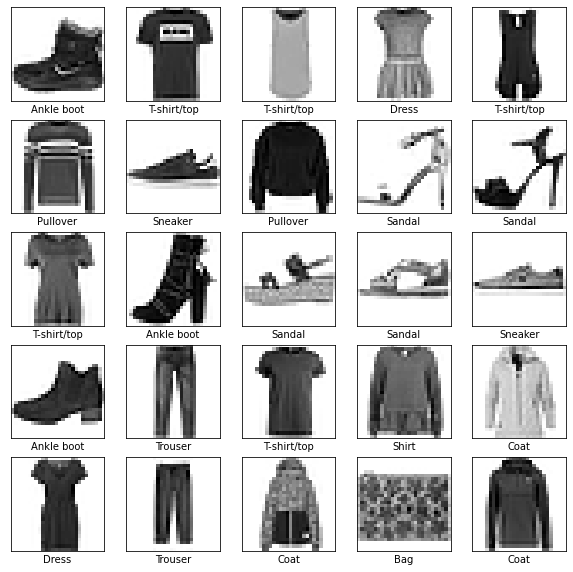

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

128 dense layer -> relu

10 dense layer -> softmax

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

optimizer=adam, loss=sparse_categorical_crossentropy

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 정규화를 하지 않고 학습 진행

In [13]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.5803 - accuracy: 0.6693
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7266 - accuracy: 0.7431
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6010 - accuracy: 0.7788
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5208 - accuracy: 0.8164
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5120 - accuracy: 0.8221


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.5424 - accuracy: 0.8277


[0.5424177050590515, 0.8277000188827515]

In [18]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})". format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
             color=color)             

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

결과) 예상보다 결과가 괜찮았음

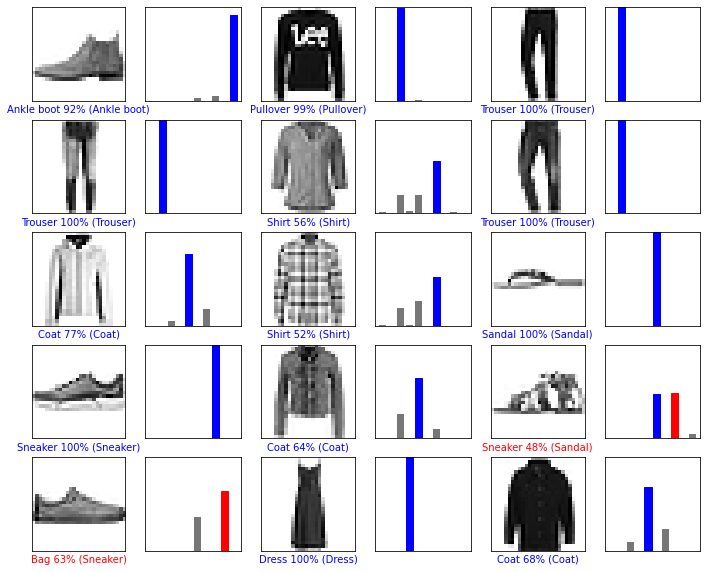

In [ ]:
predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

질문 해답) 정규화를 하지 않아도 학습은 진행된다. But sigmoid함수의 초기 input이 너무 크거나 작기 때문에 학습 속도가 느려 정확도가 낮게 나온다.

이후 10번의 추가 학습을 진행했음에도 

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4938 - accuracy: 0.8294
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4839 - accuracy: 0.8333
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4836 - accuracy: 0.8337
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4717 - accuracy: 0.8363
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4621 - accuracy: 0.8396
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4629 - accuracy: 0.8425
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4571 - accuracy: 0.8436
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4581 - accuracy: 0.8421
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4472 - accuracy: 0.8464
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.446

# 정규화를 한 후 학습 진행 (모범답안)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Sparse_categorical_crossentropy: one hot encoding이 안 된 데이터를 cross_entropy함수에 입력할 때 이용

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6287 - accuracy: 0.7804
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3835 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3414 - accuracy: 0.8761
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3178 - accuracy: 0.8810
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2943 - accuracy: 0.8900


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 1ms/step - loss: 0.3394 - accuracy: 0.8797


[0.3394090235233307, 0.8797000050544739]

결과

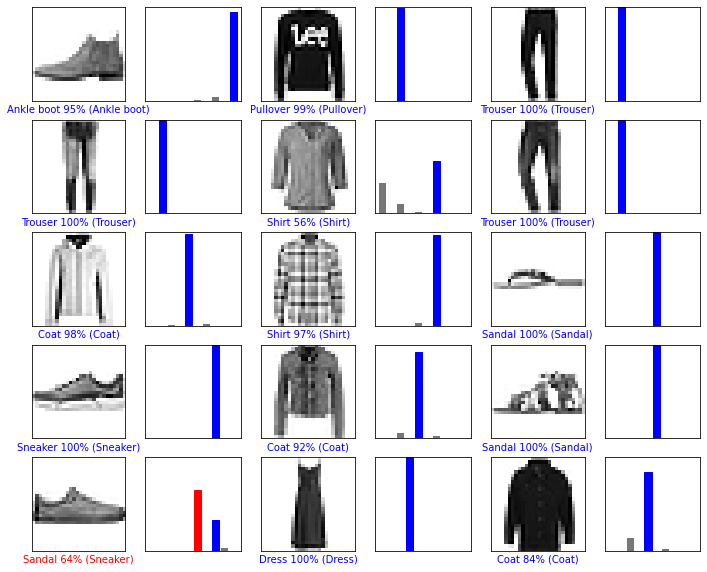

In [ ]:
predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

첫번째 relu함수로 두번째 층에 데이터를 전달한 것이 영향이었던 것으로 판단 => 10 dens, softmax 층으로만 계산해보기

# 만약 정규화 없이 10dense -> softmax층만 지났다면?

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 25.8821 - accuracy: 0.6821
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 12.4192 - accuracy: 0.7847
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 11.2519 - accuracy: 0.7942


In [21]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 9.6939 - accuracy: 0.8149


[9.693853378295898, 0.8148999810218811]

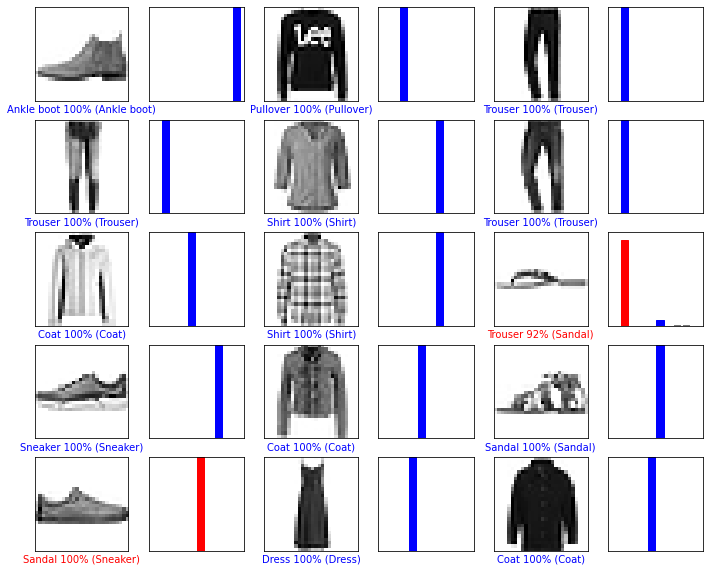

In [22]:
predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

# loss function을 categorical cross entropy function으로 바꾼다면(정규화)

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


train_images = train_images / 255.0

test_images = test_images / 255.0

from tensorflow.keras.utils import to_categorical

train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)


model.fit(train_images, train_labels_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6311 - accuracy: 0.7815
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3824 - accuracy: 0.8609
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3394 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3138 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2887 - accuracy: 0.8941


In [ ]:
model.evaluate(test_images, test_labels_onehot)

313/313 [==============================] - 1s 1ms/step - loss: 0.3708 - accuracy: 0.8701


[0.3707922399044037, 0.8701000213623047]

정규화를 한 sparse_cross_enntropy의 경우와 비슷함

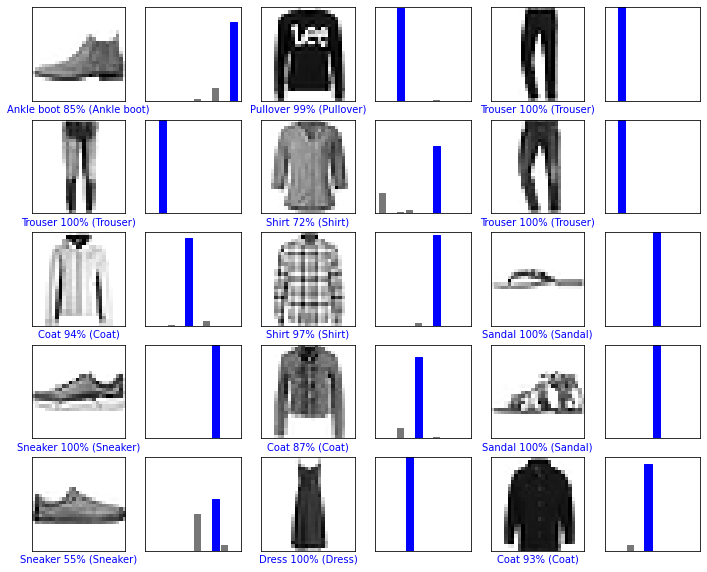

In [ ]:
predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

비용함수가 cross_entropy_function인 모델에 대해 정규화를 하지 않는다면

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])



model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

from tensorflow.keras.utils import to_categorical

train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)


model.fit(train_images, train_labels_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.2538 - accuracy: 0.6481
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7334 - accuracy: 0.7217
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6401 - accuracy: 0.7536
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5604 - accuracy: 0.8011
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5237 - accuracy: 0.8164


In [ ]:
model.evaluate(test_images, test_labels_onehot)

313/313 [==============================] - 1s 1ms/step - loss: 0.5412 - accuracy: 0.8188


[0.5412325263023376, 0.8187999725341797]

처음과 비슷한 정확도를 보임

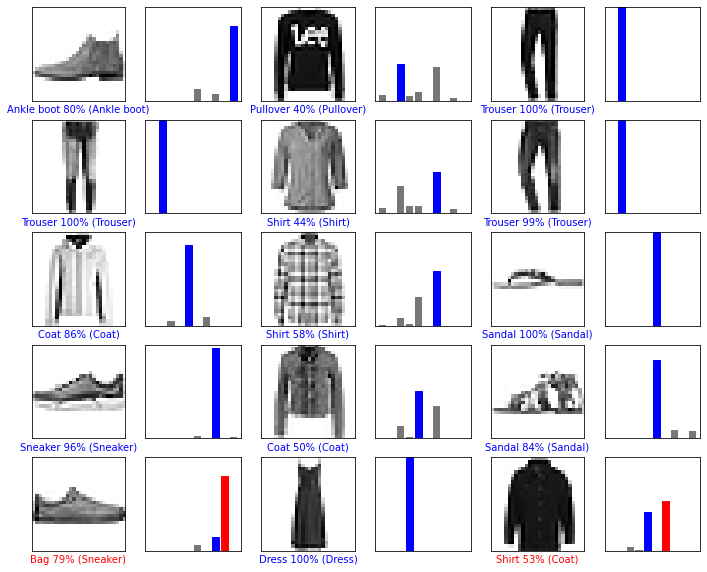

In [ ]:
predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

정규화를 하지 않고

첫번째 층을 없앤다면

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])



model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

from tensorflow.keras.utils import to_categorical

train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)


model.fit(train_images, train_labels_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 22.6123 - accuracy: 0.6884
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 12.5622 - accuracy: 0.7870
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 11.7238 - accuracy: 0.7914
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 10.3339 - accuracy: 0.8034
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 10.0589 - accuracy: 0.8051


In [25]:
model.evaluate(test_images, test_labels_onehot)

313/313 [==============================] - 0s 1ms/step - loss: 14.0266 - accuracy: 0.7781


[14.02664852142334, 0.7781000137329102]

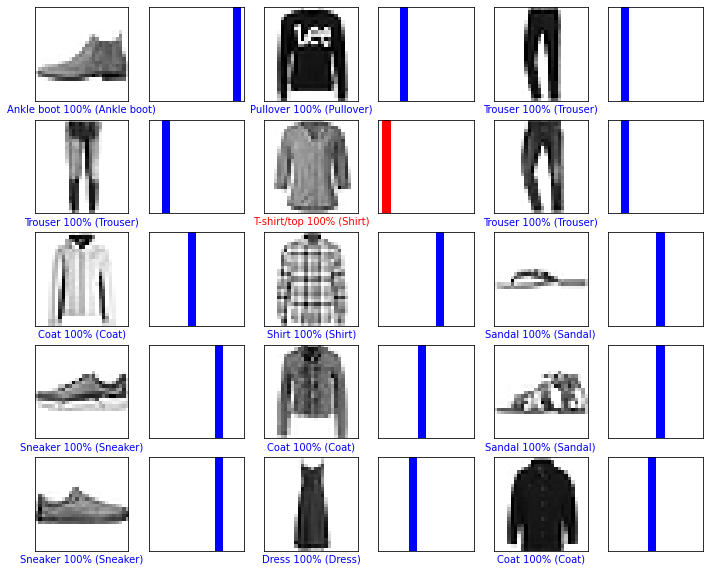

In [26]:
predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

10에포크 더 학습을 한다면

In [27]:
model.fit(train_images, train_labels_onehot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 10.0397 - accuracy: 0.8052
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.8730 - accuracy: 0.8070
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 10.0755 - accuracy: 0.8053
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.9970 - accuracy: 0.8087
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.7995 - accuracy: 0.8076
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 10.0759 - accuracy: 0.8085
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.7277 - accuracy: 0.8091
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 10.1057 - accuracy: 0.8103
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.7199 - accuracy: 0.8124
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9

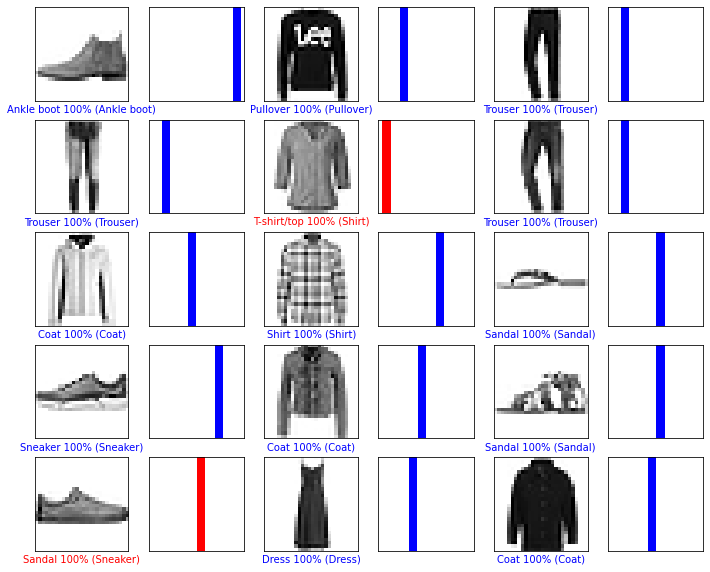

In [28]:
predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

정규화를 하고 첫 번째 층을 없앤다면

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='softmax')
])



model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

from tensorflow.keras.utils import to_categorical

train_labels_onehot = to_categorical(train_labels)
test_labels_onehot = to_categorical(test_labels)

train_images = train_images / 255.0

test_images = test_images / 255.0

model.fit(train_images, train_labels_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7925 - accuracy: 0.7365
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4682 - accuracy: 0.8396
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4377 - accuracy: 0.8502
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4234 - accuracy: 0.8537
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4161 - accuracy: 0.8565


In [ ]:
model.evaluate(test_images, test_labels_onehot)

313/313 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.8416


[0.4526878297328949, 0.8416000008583069]

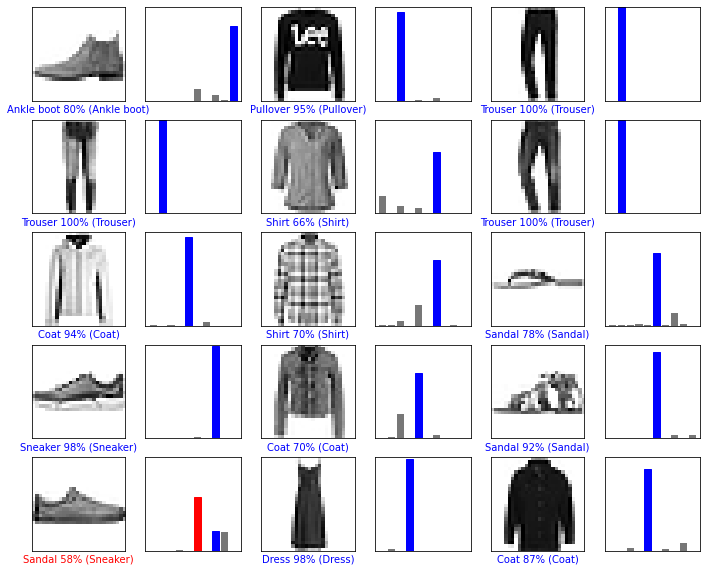

In [ ]:
predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

# 질문 결과


정규화는 학습속도에 영향을 미친다.

이는 S(w*x+b)인데, X값이 크면 가중치 S값이 크게 나오는 것과 관련이 있다.

동시에 W는 불안정하게 갱신된다.

일반적인 모델에 정규화를 하지 않으면 초기 error가 매우 크게 나오면서 학습 속도가 느리게 진행되게 된다. 해당 문제는 epoch를 늘리면 어느정도 해결이 된다.

정규화를 하지 않았을 때, hidden layer없이 10node, softmax층으로 학습한 결과 error가 크게 나왔던 이유는 X행렬이 매우 커서 S(w*x+b)이 큰 값이 나오기 때문이다

해당 문제는 epoch를 늘려도 해결되지 않으며(X값이 갱신되지 않기 때문으로 추정) 정규화를 통해 문제를 갱신해야 한다.